## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# View the dataframe
mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
# View the dataframe
study_results.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


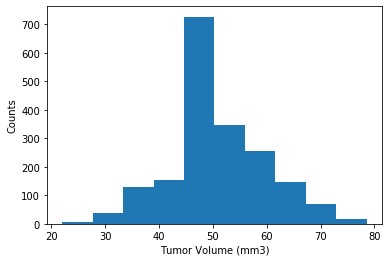

Mean results is: 50.45
Median results is: 48.95
Mode results is: 0    45.0
dtype: float64
NormaltestResult(statistic=4.576136439046645, pvalue=0.10146227550143123)


In [3]:
# Plot the data for the study results as a histogram and test it to see if it is normally distributed
plt.hist(study_results['Tumor Volume (mm3)'])
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Counts')
plt.show()
print(f"Mean results is: {round(study_results['Tumor Volume (mm3)'].mean(),2)}")
print(f"Median results is: {round(study_results['Tumor Volume (mm3)'].median(),2)}")
print(f"Mode results is: {round(study_results['Tumor Volume (mm3)'].mode(),2)}")
print(st.normaltest(study_results['Tumor Volume (mm3)'].sample(100)))

In [4]:
# Merge our two data frames together
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Review the information on the newly created merged dataframe
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
Mouse ID              1893 non-null object
Drug Regimen          1893 non-null object
Sex                   1893 non-null object
Age_months            1893 non-null int64
Weight (g)            1893 non-null int64
Timepoint             1893 non-null int64
Tumor Volume (mm3)    1893 non-null float64
Metastatic Sites      1893 non-null int64
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [5]:

drug_group_stats = combined_data.groupby('Drug Regimen').agg(\
        # Get the mean of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),\
        # Get the median of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Median=('Tumor Volume (mm3)', np.median),\
        # Get the variance of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Var=('Tumor Volume (mm3)', np.var),\
        # Get the standard deviation of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Stdev=('Tumor Volume (mm3)', np.std),\
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem)\
).round(3)

# Display the Summary statistics table grouped by 'Drug Regimen' column
drug_group_stats

,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Var,Tumor_Vol_Stdev,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.323,50.855,42.351,6.508,0.513
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Summary statistics

## Bar plots

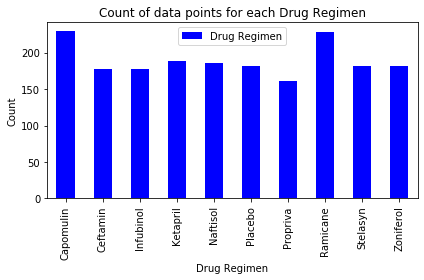

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
# First create a dataframe grouping by the 'Drug Regimen' column
drug_group = combined_data.groupby('Drug Regimen')

# Create a dataframe counting the number of data points for each Drug Regimen
drug_group_count = pd.DataFrame(drug_group['Drug Regimen'].count())


# Create a bar chart based off of the group series from before and label the title
count_chart = drug_group_count.plot(kind='bar', title="Count of data points for each Drug Regimen", color="blue")

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Count")
plt.tight_layout()
# Save the figure
plt.savefig("PandasBarChart.png")

plt.show()

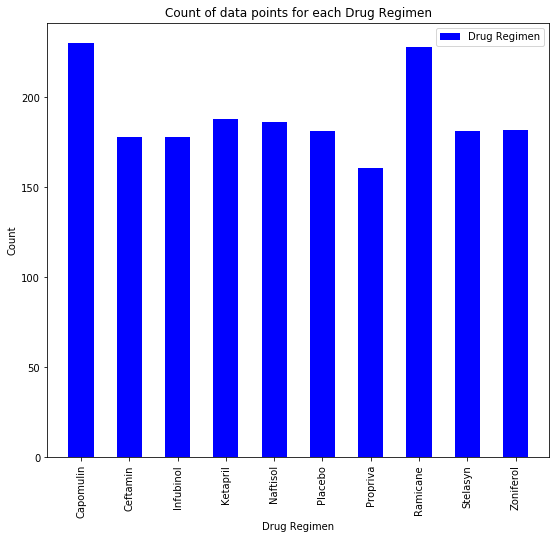

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# Set x axis and tick locations
x_axis = np.arange(len(drug_group_count))
tick_locations = [value for value in x_axis]

 # Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(9,8))
plt.bar(x_axis, drug_group_count["Drug Regimen"], color='blue', align="center", width = 0.52)
plt.xticks(tick_locations, list(drug_group_count.index), rotation="vertical")

# Set x and y limits
plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(drug_group_count["Drug Regimen"])*1.05)

# Set a Title and labels
plt.title("Count of data points for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

column_name = ["Drug Regimen"]
plt.legend(column_name,loc="best")

# Save the figure
plt.savefig("PyplotBarChart.png")
plt.show()

## Pie plots

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# First create a dataframe grouping by the 'Sex' column
gender_group = combined_data.groupby('Sex')                                                                         

# Create a dataframe counting the number of data points for each gender
gender_group_count = pd.DataFrame(gender_group['Sex'].count())

# View the groupby dataframe
gender_group_count.head()



,Sex
Sex,
Female,935
Male,958


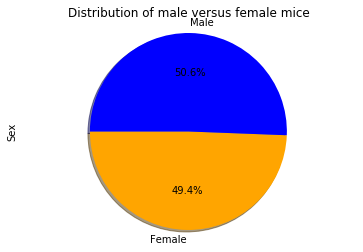

In [9]:
# Create a pie chart based off of the group series from before
gender_group_count.plot(kind='pie', y='Sex', \
                        title="Distribution of male versus female mice",startangle=180,
                        autopct='%1.1f%%',shadow=True, fontsize=10, colors =["orange","blue"],legend =False)
# Make the axis equal to avoid plotting an egg shaped pie chart
plt.axis("equal")
plt.savefig("PandaPieChart.png")
plt.show()

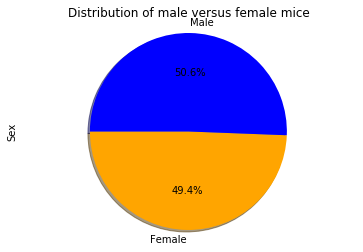

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Get Labels for our pie chart from the index values of the groupby dataframe
genders = list(gender_group_count.index.values)

# The values of each section of the pie chart
gender_counts = gender_group_count['Sex']

# The colors of each section of the pie chart
colors = ["orange", "blue"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(gender_counts, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.rcParams['font.size'] = 10
plt.title("Distribution of male versus female mice")
plt.ylabel("Sex")
plt.axis("equal")
plt.savefig("PyplotPieChart.png")
plt.show()

## Quartiles, outliers and boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Create a list of the four drugs to examine
four_drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Slice the original combined_data dataframe using the list of four drugs
four_drugs = combined_data[combined_data['Drug Regimen'].isin(four_drug_list)]

# View the newly created subset dataframe
four_drugs.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [12]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
four_last_tumor = four_drugs.groupby(['Drug Regimen','Mouse ID']).agg(\
        # Get the last value of the 'Tumor Volume (mm3)' column using a lambda function selecting the element in -1 position
        Final_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)

# View the groupby dataframe
four_last_tumor

Final_tumor_size
Drug Regimen Mouse ID                  
Capomulin    b128                38.983
             b742                38.940
             f966                30.486
             g288                37.074
             g316                40.159
...                                 ...
Ramicane     s508                30.276
             u196                40.668
             w678                43.166
             y449                44.183
             z578                30.639

[100 rows x 1 columns]

In [13]:
four_last_tumor_unstack = four_last_tumor.stack(level=0).unstack(level=0)
# View the result to confirm transpose
four_last_tumor_unstack.head()

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,Final_tumor_size,NaN,NaN,67.973,NaN
a251,Final_tumor_size,NaN,NaN,65.526,NaN
a275,Final_tumor_size,NaN,62.999,NaN,NaN
a411,Final_tumor_size,NaN,NaN,NaN,38.408
a444,Final_tumor_size,NaN,NaN,NaN,43.048


In [14]:
#Outliers
# Set counter 
counter = 0

# Do quartile calculations 
for drug in four_drug_list:
    quartiles = four_last_tumor_unstack[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    # Check if it is the first time through the for loop, if so then print dividing line at top only
    if counter == 0:
        print(f"-----------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"Lower quartile of {drug} is: {lowerq}")
    print(f"Upper quartile of {drug} is: {upperq}")
    print(f"Interquartile range of {drug} is: {iqr}")
    print(f"The median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers....")
    print(f"Values above {upper_bound} for {drug} could be outliers....")
    print(f"-----------------------------------------------------------")
    counter += 1

-----------------------------------------------------------
Capomulin IQR data is:
Lower quartile of Capomulin is: 32.38
Upper quartile of Capomulin is: 40.16
Interquartile range of Capomulin is: 7.78
The median of Capomulin is: 38.12 
Values below 20.71 for Capomulin could be outliers....
Values above 51.83 for Capomulin could be outliers....
-----------------------------------------------------------
Ramicane IQR data is:
Lower quartile of Ramicane is: 31.56
Upper quartile of Ramicane is: 40.66
Interquartile range of Ramicane is: 9.1
The median of Ramicane is: 36.56 
Values below 17.91 for Ramicane could be outliers....
Values above 54.31 for Ramicane could be outliers....
-----------------------------------------------------------
Infubinol IQR data is:
Lower quartile of Infubinol is: 54.05
Upper quartile of Infubinol is: 65.53
Interquartile range of Infubinol is: 11.48
The median of Infubinol is: 60.16 
Values below 36.83 for Infubinol could be outliers....
Values above 82.75 for I

In [15]:
#boxplots
# Create an empty list
boxplot_list = []

# Iterate through the list of the four drugs names using them to select the same column names
# and appending to the boxplot_list
for drug in four_drug_list:
    boxplot_list.append(list(four_last_tumor_unstack[drug].dropna()))


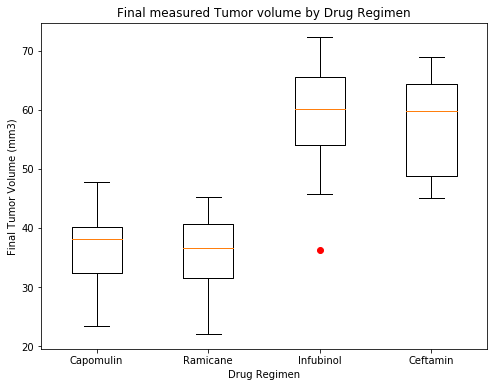

In [16]:
# Plot the list of lists using a boxplot utilizing the same y-axis for all plots
fig1, ax = plt.subplots(figsize=(8,6))
ax.set_title('Final measured Tumor volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.boxplot(boxplot_list,notch=0,sym='r')
plt.xticks([1,2,3,4],four_drug_list)

# Save the figure
plt.savefig("BoxWhiskerPlot.png")

plt.show()

## Line and scatter plots

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Create a dataframe for only the Capomulin data
capomulin_data = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']

# View the dataframe
capomulin_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [18]:
# sem just for kicks 
cap_time_tumor = capomulin_data.groupby(['Timepoint']).agg(
        # Get the mean of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Sem=('Tumor Volume (mm3)', st.sem)).round(3)

# View the groupby dataframe 
cap_time_tumor.head(10)

,Tumor_Vol_Mean,Tumor_Vol_Sem
Timepoint,,
0,45.000,0.000
5,44.266,0.449
10,43.084,0.703
15,42.064,0.839
20,40.716,0.910
25,39.940,0.882
30,38.769,0.934
35,37.817,1.052
40,36.958,1.224


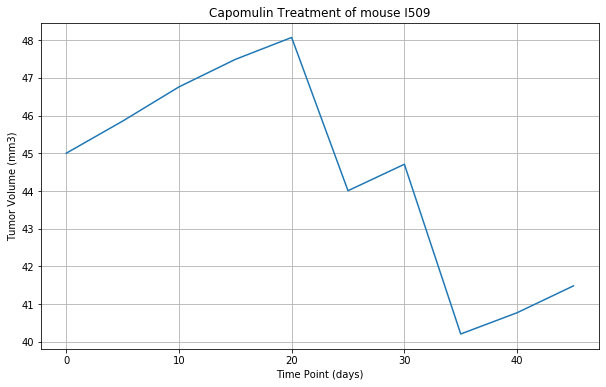

<Figure size 432x288 with 0 Axes>

In [19]:

# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#capomulinn_plot= mouse_study_Results[mouse_study_Results["Drug Regimen"]=="Capomulin"]
regimen=capomulin_data["Drug Regimen"]=="Capomulin"
mouse_sel = capomulin_data["Mouse ID"]=="l509"

capomulinn_plot= capomulin_data[regimen & mouse_sel]
plt.figure(figsize=(10,6))

# Create a title, x label, and y label for our chart
x_axis= capomulinn_plot["Timepoint"]
y_axis= capomulinn_plot["Tumor Volume (mm3)"]
plt.plot(x_axis,y_axis)

plt.xlabel("Time Point (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of mouse I509")

plt.grid(True)
plt.show()
# Save the figure
plt.savefig("LineTimepointTumorVol.png")


In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# View Capomulin dataframe
capomulin_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [21]:
cap_mouse_id = capomulin_data.groupby(['Mouse ID']).agg(\
        # Get the mean of the 'Tumor Volume (mm3)' column\
        Mouse_weight=('Weight (g)', np.mean),\
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column\
        Tumor_vol_mean=('Tumor Volume (mm3)', np.mean)\
).round(3)
cap_mouse_id.head(40)

,Mouse_weight,Tumor_vol_mean
Mouse ID,,
b128,22,41.964
b742,21,40.084
f966,17,36.506
g288,19,41.990
g316,22,44.613
i557,24,44.806
i738,20,39.141
j119,23,44.465
j246,21,43.217


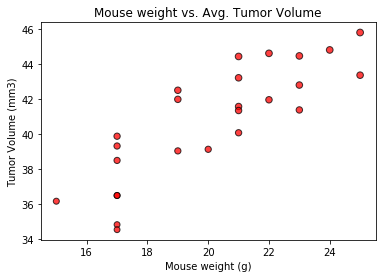

In [22]:
#create scatter plot from the above dataframe
plt.scatter(
    cap_mouse_id['Mouse_weight'],
    cap_mouse_id['Tumor_vol_mean'],
    marker='o',
    facecolors='red',
    edgecolors='black',
    s=cap_mouse_id['Tumor_vol_mean'],
    alpha=.75)

# Create a title, x label, and y label for our chart
plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
# Save the figure
plt.savefig("ScatterWeightTumorVol.png")

plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


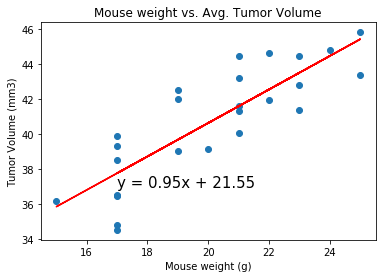

In [23]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(cap_mouse_id['Mouse_weight'],cap_mouse_id['Tumor_vol_mean'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")




# Print out the r-squared value along with the plot.
x_values = cap_mouse_id['Mouse_weight']
y_values = cap_mouse_id['Tumor_vol_mean']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")


# Save the figure
plt.savefig("ScatterWeightTumorVolRegression.png")

plt.show()